In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
import numpy as np


In [2]:
data = pd.read_csv("FastagFraudDetection.csv")

In [3]:
data.head(10)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
5,6,1/11/2023 10:00,Sedan,FTG-066-GHI-987,A-101,Regular,Medium,160,100,"13.059816123454882, 77.77068662374292",105,KA77KL0123,Fraud
6,7,1/12/2023 15:40,SUV,FTG-707-JKL-210,B-102,Express,Large,180,160,"13.059816123454882, 77.77068662374292",70,KA22MN4567,Fraud
7,8,1/13/2023 20:15,Bus,FTG-088-UVW-543,C-103,Regular,Large,350,90,"13.059816123454882, 77.77068662374292",88,KA21OP8901,Fraud
8,9,1/14/2023 1:55,Car,FTG-909-RST-876,A-101,Express,Small,120,0,"13.059816123454882, 77.77068662374292",45,KA16QR2345,Fraud
9,10,1/15/2023 7:30,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",72,KA22ST6789,Not Fraud


In [4]:
data.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [6]:
data.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [7]:
data.isna().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [8]:
data.dtypes

Transaction_ID            int64
Timestamp                object
Vehicle_Type             object
FastagID                 object
TollBoothID              object
Lane_Type                object
Vehicle_Dimensions       object
Transaction_Amount        int64
Amount_paid               int64
Geographical_Location    object
Vehicle_Speed             int64
Vehicle_Plate_Number     object
Fraud_indicator          object
dtype: object

In [9]:
data["Timestamp"] = pd.to_datetime(data['Timestamp'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Transaction_ID         5000 non-null   int64         
 1   Timestamp              5000 non-null   datetime64[ns]
 2   Vehicle_Type           5000 non-null   object        
 3   FastagID               4451 non-null   object        
 4   TollBoothID            5000 non-null   object        
 5   Lane_Type              5000 non-null   object        
 6   Vehicle_Dimensions     5000 non-null   object        
 7   Transaction_Amount     5000 non-null   int64         
 8   Amount_paid            5000 non-null   int64         
 9   Geographical_Location  5000 non-null   object        
 10  Vehicle_Speed          5000 non-null   int64         
 11  Vehicle_Plate_Number   5000 non-null   object        
 12  Fraud_indicator        5000 non-null   object        
dtypes: 

In [11]:
data['Fraud_indicator'].unique()

array(['Fraud', 'Not Fraud'], dtype=object)

In [12]:
#data = data.drop(['FastagID'], axis=1)

In [13]:
data.dropna(subset=['FastagID'])

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,2023-01-06 11:20:00,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,2023-01-07 14:55:00,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
3,4,2023-01-09 02:05:00,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,2023-01-10 06:35:00,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
5,6,2023-01-11 10:00:00,Sedan,FTG-066-GHI-987,A-101,Regular,Medium,160,100,"13.059816123454882, 77.77068662374292",105,KA77KL0123,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,2023-01-01 22:18:00,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,2023-01-17 13:43:00,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2023-02-05 05:08:00,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2023-02-20 20:34:00,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


In [15]:
encoded_data = data.copy()

In [16]:
numerical_columns = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']
categorical_columns = ['Vehicle_Type', 'TollBoothID', 'Lane_Type', 
                       'Vehicle_Dimensions', 'Geographical_Location', 'Vehicle_Plate_Number', 'Fraud_indicator', 'FastagID']

le = LabelEncoder()

for col in categorical_columns:
    encoded_data[col] = le.fit_transform(encoded_data[col].astype(str))
    
Q1 = encoded_data[numerical_columns].quantile(0.25)
Q3 = encoded_data[numerical_columns].quantile(0.75)

IQR = Q3 - Q1

filtered_data = encoded_data[~((encoded_data[numerical_columns] < (Q1 - 1.5 * IQR)) | (encoded_data[numerical_columns]>(Q3 + 1.5*IQR))).any(axis=1)]

In [17]:
missing_values = data.isnull().sum()

missing_values, filtered_data.head()

(Transaction_ID             0
 Timestamp                  0
 Vehicle_Type               0
 FastagID                 549
 TollBoothID                0
 Lane_Type                  0
 Vehicle_Dimensions         0
 Transaction_Amount         0
 Amount_paid                0
 Geographical_Location      0
 Vehicle_Speed              0
 Vehicle_Plate_Number       0
 Fraud_indicator            0
 dtype: int64,
    Transaction_ID           Timestamp  Vehicle_Type  FastagID  TollBoothID  \
 0               1 2023-01-06 11:20:00             0         2            0   
 1               2 2023-01-07 14:55:00             1         9            1   
 2               3 2023-01-08 18:25:00             2      4451            3   
 3               4 2023-01-09 02:05:00             5       241            2   
 4               5 2023-01-10 06:35:00             6      2860            1   
 
    Lane_Type  Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
 0          0                   0                

In [18]:
filtered_data.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,2023-01-06 11:20:00,0,2,0,0,0,350,120,3,65,1482,0
1,2,2023-01-07 14:55:00,1,9,1,1,2,120,100,3,78,3066,0
2,3,2023-01-08 18:25:00,2,4451,3,1,2,0,0,3,53,3663,1
3,4,2023-01-09 02:05:00,5,241,2,1,0,350,120,3,92,1498,0
4,5,2023-01-10 06:35:00,6,2860,1,0,1,140,100,3,60,2409,0


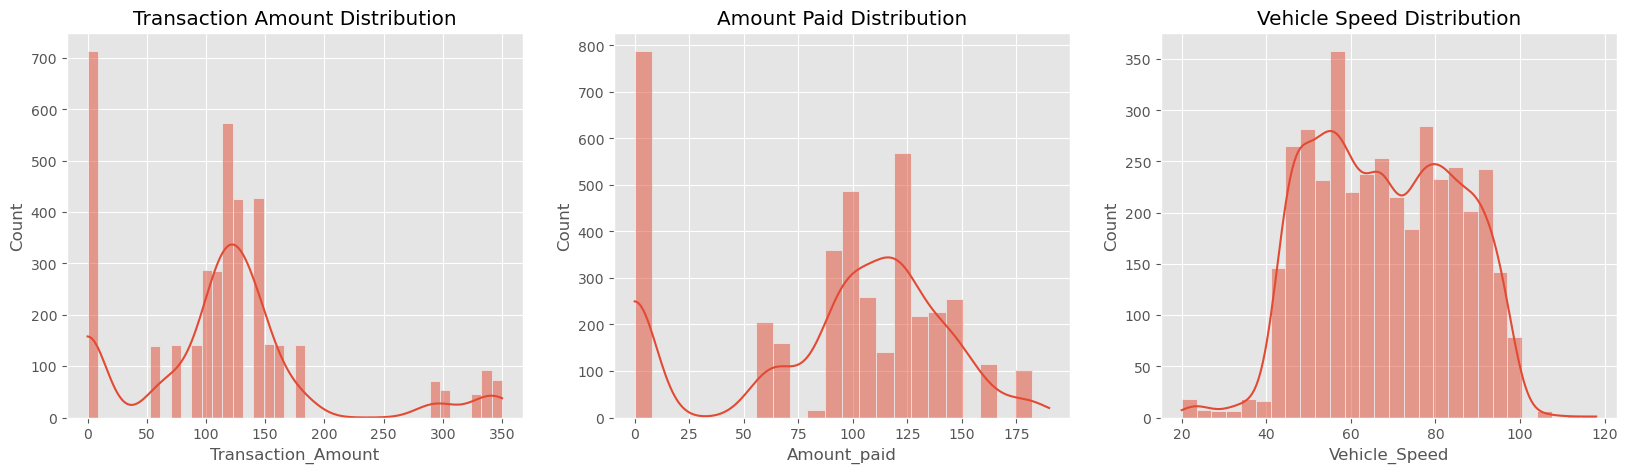

In [19]:
plt.style.use('ggplot')

numerical_summary = filtered_data.describe()

fig, axes = plt.subplots(1, 3, figsize = (20,5))

sns.histplot(filtered_data['Transaction_Amount'], ax = axes[0],kde = True)
axes[0].set_title('Transaction Amount Distribution')

sns.histplot(filtered_data['Amount_paid'], ax = axes[1],kde = True)
axes[1].set_title('Amount Paid Distribution')

sns.histplot(filtered_data['Vehicle_Speed'], ax = axes[2],kde = True)
axes[2].set_title('Vehicle Speed Distribution')

plt.show()

C:\Users\Siddhanth\AppData\Local\Temp\ipykernel_23856\137865138.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = filtered_data.corr()


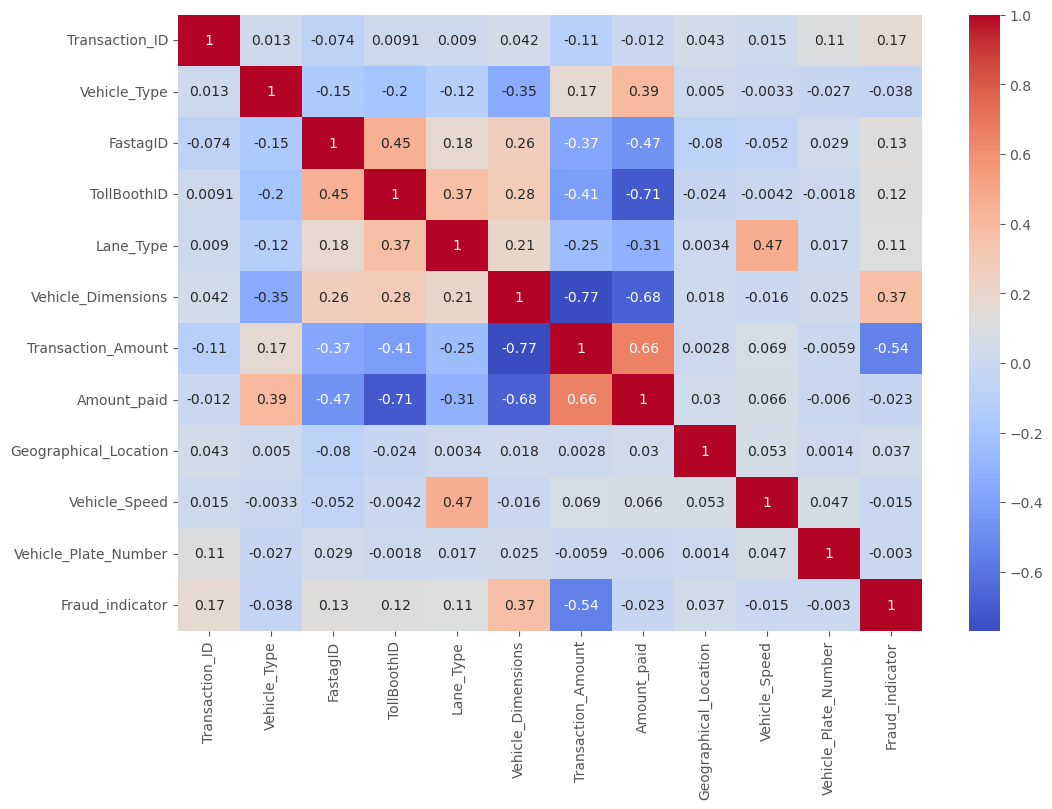

In [20]:
corr = filtered_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [21]:
data.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,2023-01-06 11:20:00,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,2023-01-07 14:55:00,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,2023-01-08 18:25:00,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,2023-01-09 02:05:00,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,2023-01-10 06:35:00,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [22]:
data.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,2023-01-06 11:20:00,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,2023-01-07 14:55:00,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,2023-01-08 18:25:00,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,2023-01-09 02:05:00,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,2023-01-10 06:35:00,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [23]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Minute'] = data['Timestamp'].dt.minute
data['Hour'] = data['Timestamp'].dt.hour
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek
data['Month'] = data['Timestamp'].dt.month

data['hour_sin'] = np.sin(2 * np.pi * data['Hour'] / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['Hour'] / 24)
data['DayOfWeek_sin'] = np.sin(2 * np.pi * data['DayOfWeek'] / 7)
data['DayOfWeek_cos'] = np.sin(2 * np.pi * data['DayOfWeek'] / 7) 


categorical_columns = ['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'FastagID', 
                       'Geographical_Location', 'Vehicle_Plate_Number', 'Fraud_indicator']
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col].astype(str))
    



In [35]:
data

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,...,Vehicle_Plate_Number,Fraud_indicator,Minute,Hour,DayOfWeek,Month,hour_sin,hour_cos,DayOfWeek_sin,DayOfWeek_cos
0,1,2023-01-06 11:20:00,0,2,0,0,0,350,120,3,...,1482,0,20,11,4,1,0.258819,-9.659258e-01,-0.433884,-0.433884
1,2,2023-01-07 14:55:00,1,9,1,1,2,120,100,3,...,3066,0,55,14,5,1,-0.500000,-8.660254e-01,-0.974928,-0.974928
2,3,2023-01-08 18:25:00,2,4451,3,1,2,0,0,3,...,3663,1,25,18,6,1,-1.000000,-1.836970e-16,-0.781831,-0.781831
3,4,2023-01-09 02:05:00,5,241,2,1,0,350,120,3,...,1498,0,5,2,0,1,0.500000,8.660254e-01,0.000000,0.000000
4,5,2023-01-10 06:35:00,6,2860,1,0,1,140,100,3,...,2409,0,35,6,1,1,1.000000,6.123234e-17,0.781831,0.781831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,2023-01-01 22:18:00,5,2596,2,1,0,330,330,4,...,3332,1,18,22,6,1,-0.500000,8.660254e-01,-0.781831,-0.781831
4996,4997,2023-01-17 13:43:00,6,2598,1,0,1,125,125,4,...,2288,1,43,13,1,1,-0.258819,-9.659258e-01,0.781831,0.781831
4997,4998,2023-02-05 05:08:00,4,2605,0,1,1,115,115,4,...,2098,1,8,5,6,2,0.965926,2.588190e-01,-0.781831,-0.781831
4998,4999,2023-02-20 20:34:00,3,2676,1,0,0,145,145,4,...,2248,1,34,20,0,2,-0.866025,5.000000e-01,0.000000,0.000000


In [24]:
X = data.drop(['Fraud_indicator', 'Timestamp'], axis=1)
Y = data['Fraud_indicator']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X, Y)
mi = pd.DataFrame({'Feature': X.columns, 'Mutual_Information': mi})
print(mi)

                  Feature  Mutual_Information
0          Transaction_ID            0.002421
1            Vehicle_Type            0.037309
2                FastagID            0.032754
3             TollBoothID            0.032553
4               Lane_Type            0.000000
5      Vehicle_Dimensions            0.017780
6      Transaction_Amount            0.037427
7             Amount_paid            0.145059
8   Geographical_Location            0.003206
9           Vehicle_Speed            0.000000
10   Vehicle_Plate_Number            0.017291
11                 Minute            0.008663
12                   Hour            0.000000
13              DayOfWeek            0.000813
14                  Month            0.006838
15               hour_sin            0.016172
16               hour_cos            0.004022
17          DayOfWeek_sin            0.000000
18          DayOfWeek_cos            0.004752


Logistic Regression

In [ ]:
X = X.drop(['Lane_Type', 'Vehicle_Speed'])

In [27]:
lr = LogisticRegression()
lr.fit(X_train_scaled, Y_train)

LogisticRegression()

In [28]:
y_pred = lr.predict(X_test_scaled)
y_pred_proba = lr.predict_proba(X_test_scaled)[:,1]

Accuracy: 0.97
Precision: 0.96
Recall: 1.00
F1 Score: 0.98
AUC-ROC: 0.98


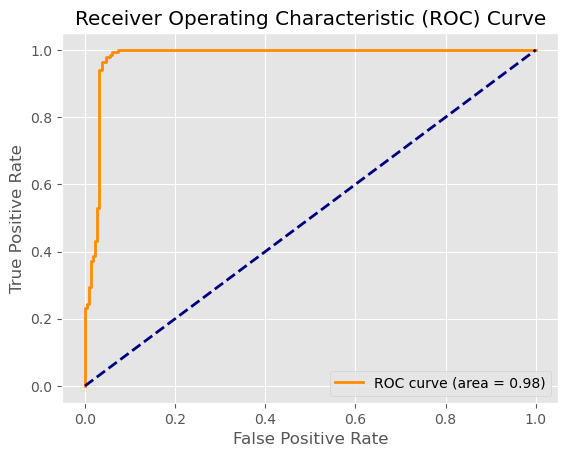

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
auc_roc = roc_auc_score(Y_test,y_pred_proba)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)],
    'max_features' : ['sqrt', 'log2', None],
    'max_depth' : [int(x) for x in np.linspace(start = 1, stop = 200)],
    'max_leaf_nodes' : [int(x) for x in np.linspace(start = 1, stop = 20)],

}

In [ ]:
"""grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid)

grid_search.fit(X_train, Y_train)

print(grid_search.best_estimator_)"""

In [44]:
random_search = RandomizedSearchCV(RandomForestClassifier(), 
                                   param_grid) 
random_search.fit(X_train, Y_train) 
print(random_search.best_estimator_) 

RandomForestClassifier(max_depth=147, max_features=None, max_leaf_nodes=9,
                       n_estimators=133)


Accuracy: 0.97
Precision: 0.96
Recall: 1.00
F1 Score: 0.98
AUC-ROC: 1.00


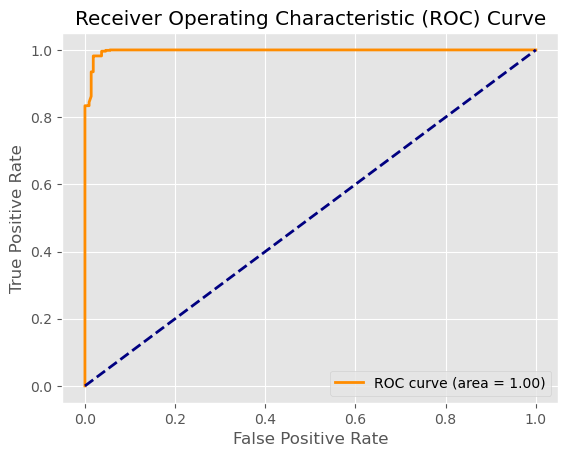

In [48]:
rfc = RandomForestClassifier(max_depth=147, max_features=None, max_leaf_nodes=9, n_estimators=133)

model = rfc.fit(X_train_scaled, Y_train)
y_pred_dt = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:,1]

accuracy = accuracy_score(Y_test, y_pred_dt)
precision = precision_score(Y_test, y_pred_dt)
recall = recall_score(Y_test, y_pred_dt)
f1 = f1_score(Y_test, y_pred_dt)
auc_roc = roc_auc_score(Y_test,y_pred_proba)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Decision Tree

Accuracy: 0.93
Precision: 0.92
Recall: 1.00
F1 Score: 0.96
AUC-ROC: 0.97


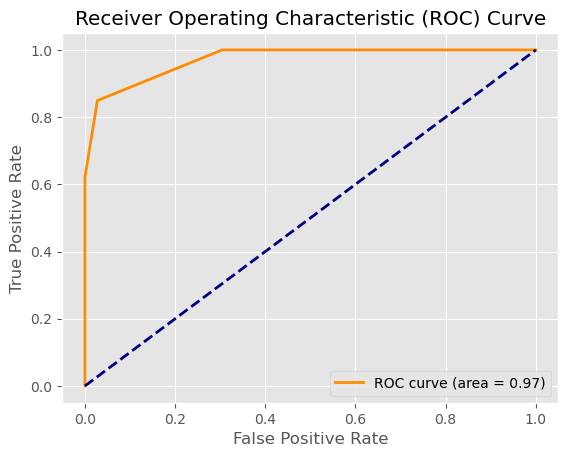

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)

dt.fit(X_train_scaled, Y_train)

y_pred_dt = dt.predict(X_test_scaled)
y_pred_proba = dt.predict_proba(X_test_scaled)[:,1]

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

accuracy = accuracy_score(Y_test, y_pred_dt)
precision = precision_score(Y_test, y_pred_dt)
recall = recall_score(Y_test, y_pred_dt)
f1 = f1_score(Y_test, y_pred_dt)
auc_roc = roc_auc_score(Y_test,y_pred_proba)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Naive Baiss


Accuracy: 0.80
Precision: 0.90
Recall: 0.84
F1 Score: 0.87
AUC-ROC: 0.85


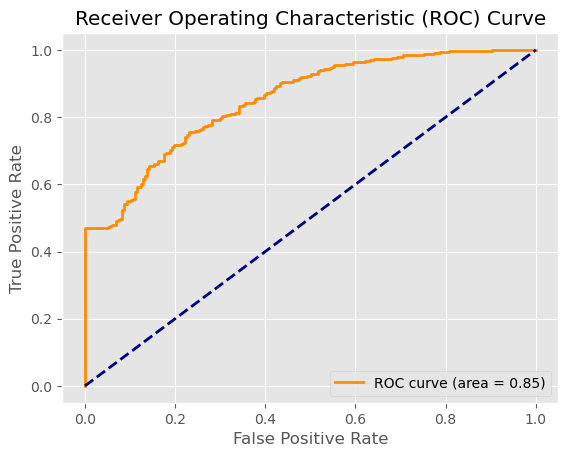

In [32]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
gnb = GaussianNB()

# Model training
gnb = gnb.fit(X_train_scaled, Y_train)

y_pred_dt = gnb.predict(X_test_scaled)
y_pred_proba = gnb.predict_proba(X_test_scaled)[:,1]

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

accuracy = accuracy_score(Y_test, y_pred_dt)
precision = precision_score(Y_test, y_pred_dt)
recall = recall_score(Y_test, y_pred_dt)
f1 = f1_score(Y_test, y_pred_dt)
auc_roc = roc_auc_score(Y_test,y_pred_proba)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.82
Precision: 0.83
Recall: 0.96
F1 Score: 0.89
AUC-ROC: 0.77


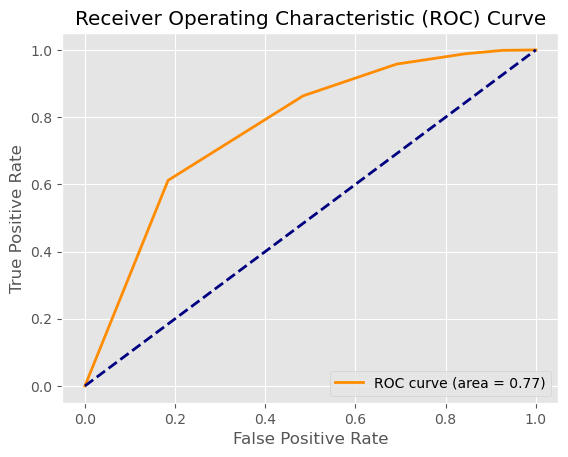

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train_scaled, Y_train)

y_pred_dt = knn.predict(X_test_scaled)
y_pred_proba = knn.predict_proba(X_test_scaled)[:,1]

accuracy = accuracy_score(Y_test, y_pred_dt)
precision = precision_score(Y_test, y_pred_dt)
recall = recall_score(Y_test, y_pred_dt)
f1 = f1_score(Y_test, y_pred_dt)
auc_roc = roc_auc_score(Y_test,y_pred_proba)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [34]:
cm = confusion_matrix(Y_test, y_pred_dt)
cm

array([[ 67, 150],
       [ 33, 750]], dtype=int64)